In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
from sklearn import metrics
import pickle
%matplotlib inline

#Train test Split
from sklearn.model_selection import train_test_split

#Applying Standardization
from sklearn.preprocessing import StandardScaler

#OneHotEncoding
from sklearn.preprocessing import OneHotEncoder

#Dealing with imbalanced dataset SMOTENC
from imblearn.over_sampling import SMOTENC

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [13]:
df = pd.read_csv("~/data/insurance_fraud_claims.csv")

In [16]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [17]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [18]:
df['policy_annual_premium'] = df['policy_annual_premium'].astype('int64')

In [19]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [20]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [22]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,":", df[i].nunique())

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
fraud_reported : 2


In [23]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [24]:
df.replace('?',np.nan,inplace=True)

In [25]:
df['collision_type'] =df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] =df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] =df['police_report_available'].fillna(df['police_report_available'].mode()[0])
countplot_columns = ['insured_sex','incident_type','collision_type','incident_severity','witnesses','property_damage','authorities_contacted']


In [26]:
list(enumerate(countplot_columns))

[(0, 'insured_sex'),
 (1, 'incident_type'),
 (2, 'collision_type'),
 (3, 'incident_severity'),
 (4, 'witnesses'),
 (5, 'property_damage'),
 (6, 'authorities_contacted')]

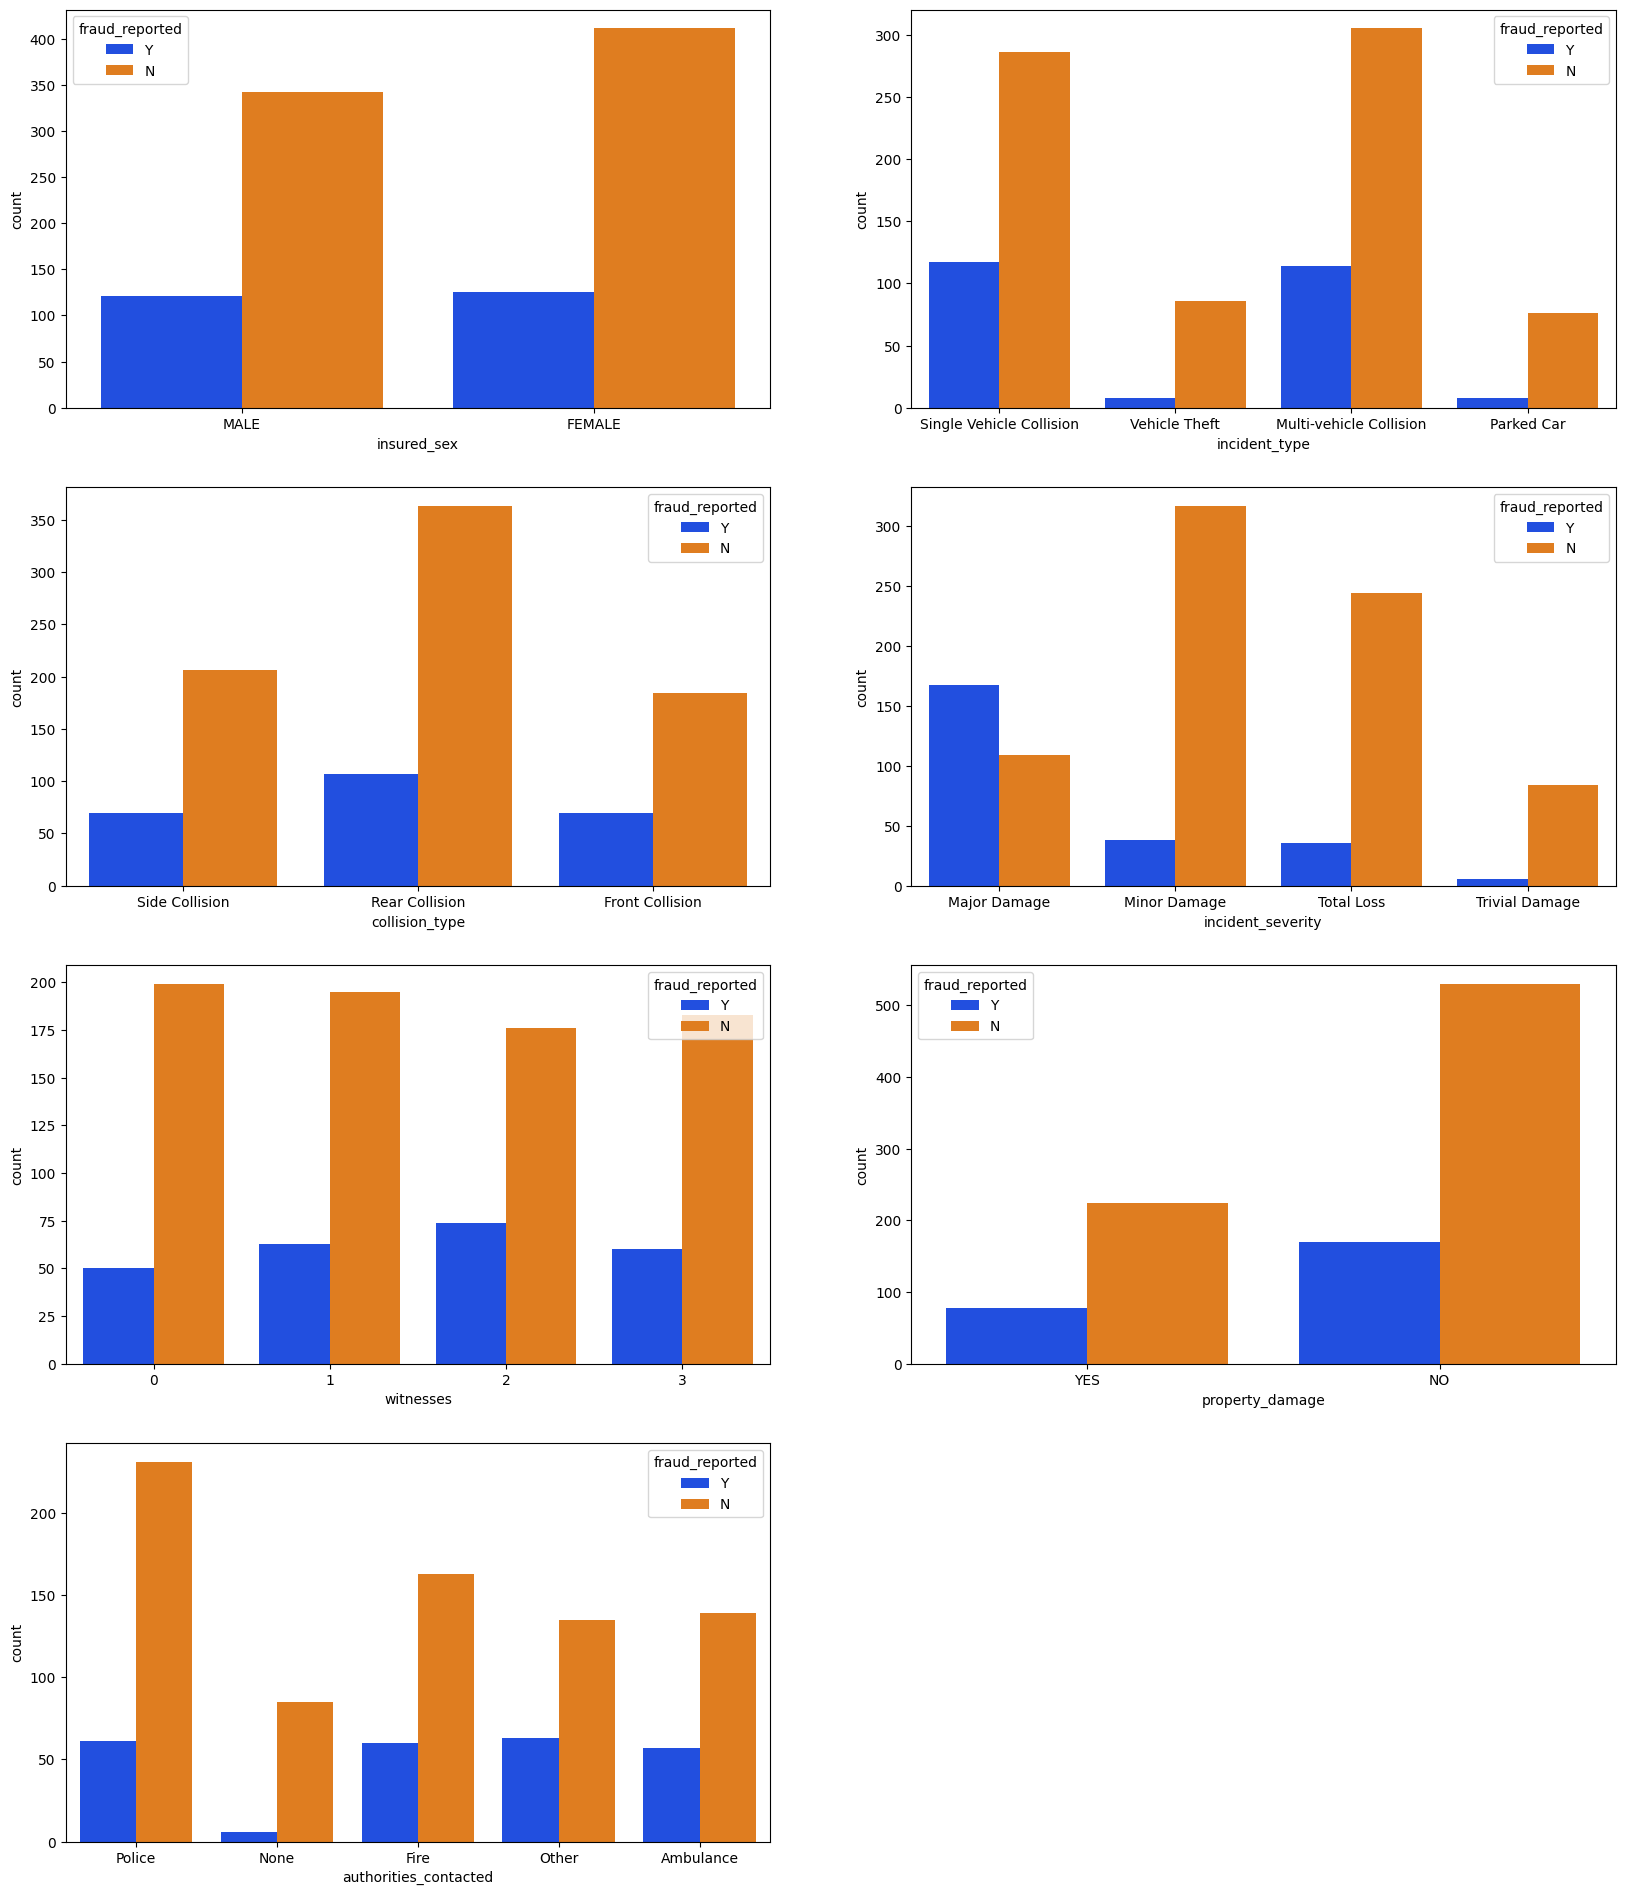

In [27]:
plt.figure(figsize=[20,30])
for i in enumerate(countplot_columns):
    plt.subplot(5,2,i[0]+1)
    sns.countplot(data=df, x =i[1],hue='fraud_reported',palette='bright')

In [29]:
histplot_columns = ['policy_deductable','policy_annual_premium', 'umbrella_limit','capital-gains','capital-loss','months_as_customer','age','total_claim_amount']

In [30]:
list(enumerate(histplot_columns))

[(0, 'policy_deductable'),
 (1, 'policy_annual_premium'),
 (2, 'umbrella_limit'),
 (3, 'capital-gains'),
 (4, 'capital-loss'),
 (5, 'months_as_customer'),
 (6, 'age'),
 (7, 'total_claim_amount')]

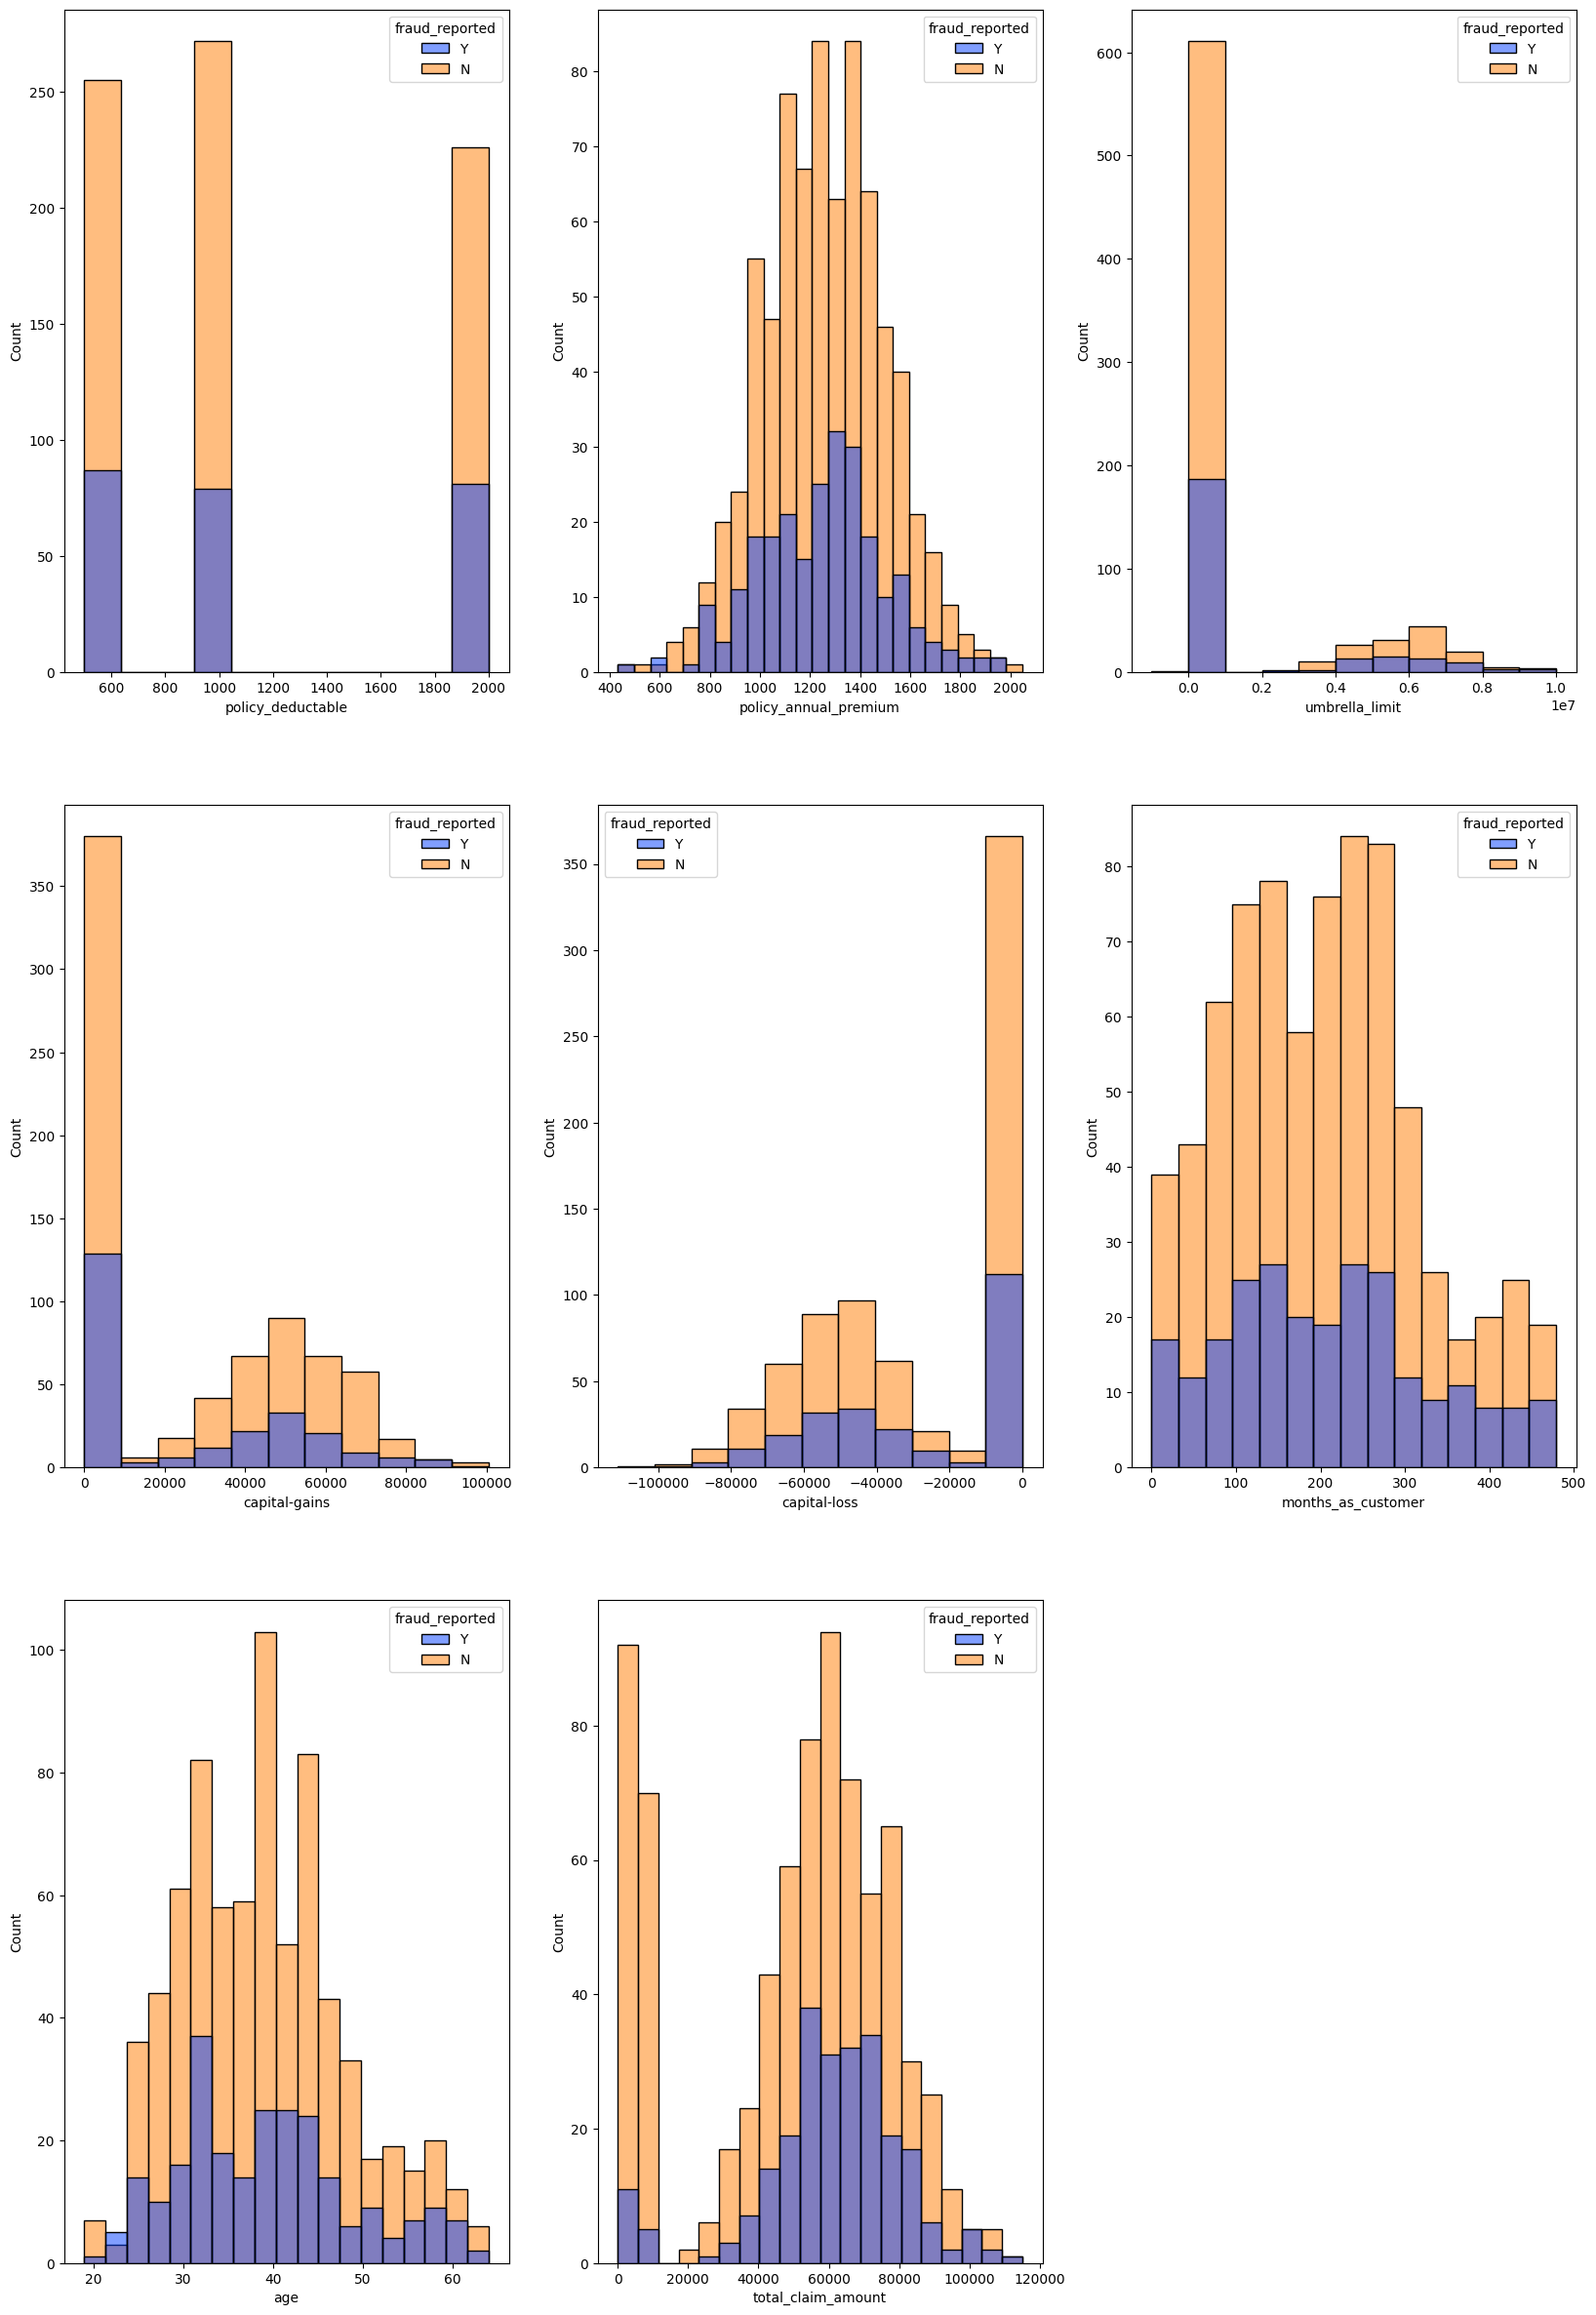

In [32]:
plt.figure(figsize=[20,30])
for z in enumerate(histplot_columns):
    plt.subplot(3,3,z[0]+1)
    sns.histplot(df,x =z[1],hue='fraud_reported',palette='bright')

<Axes: xlabel='insured_hobbies', ylabel='count'>

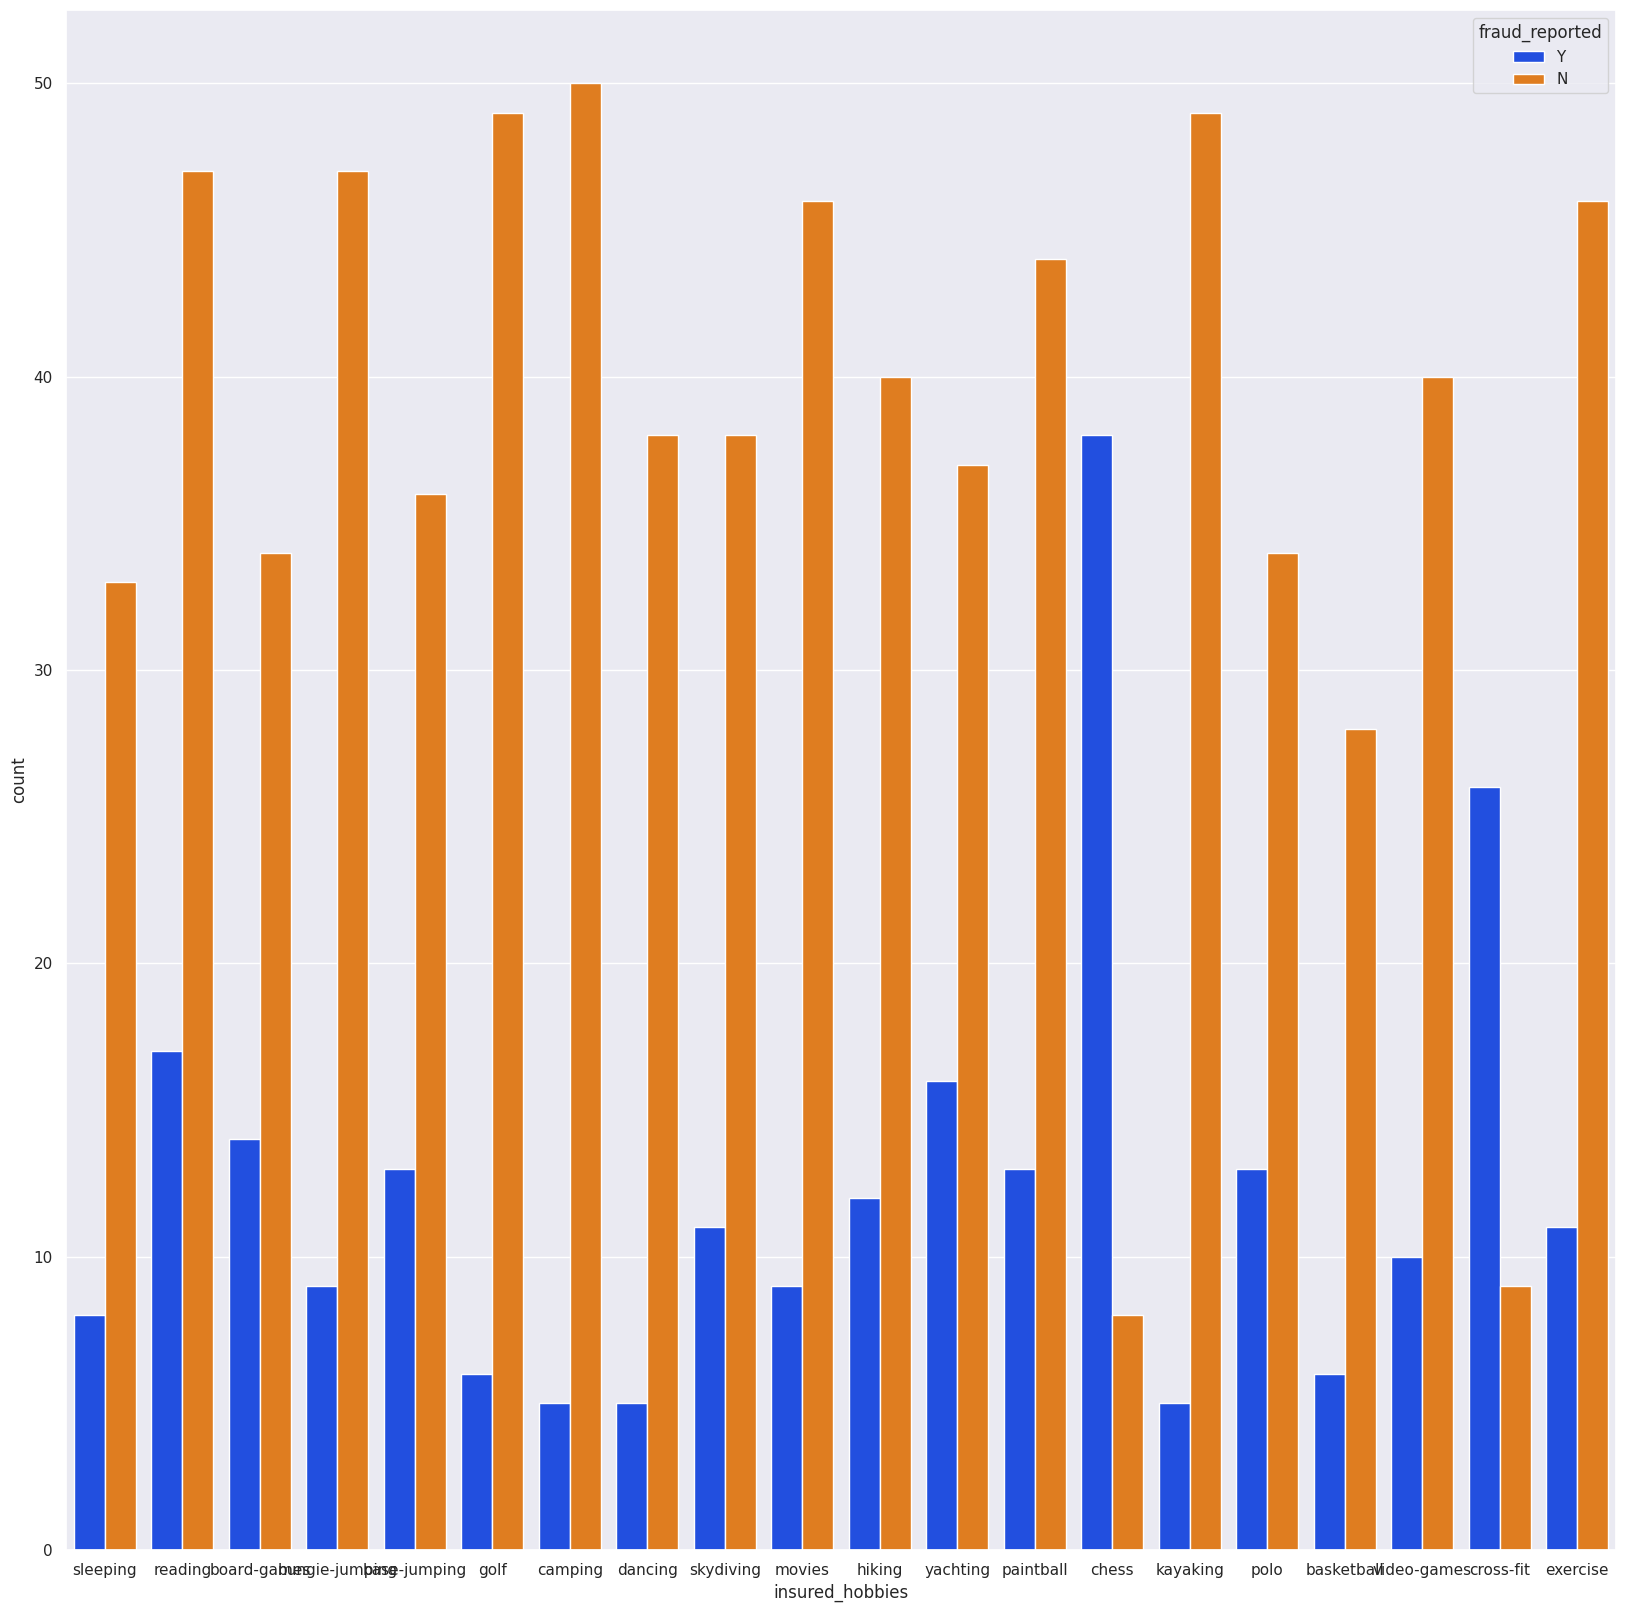

In [34]:
sns.set(rc={'figure.figsize':(20,20)})
sns.countplot(x='insured_hobbies',data=df,hue='fraud_reported',palette='bright')

<Axes: xlabel='auto_model', ylabel='count'>

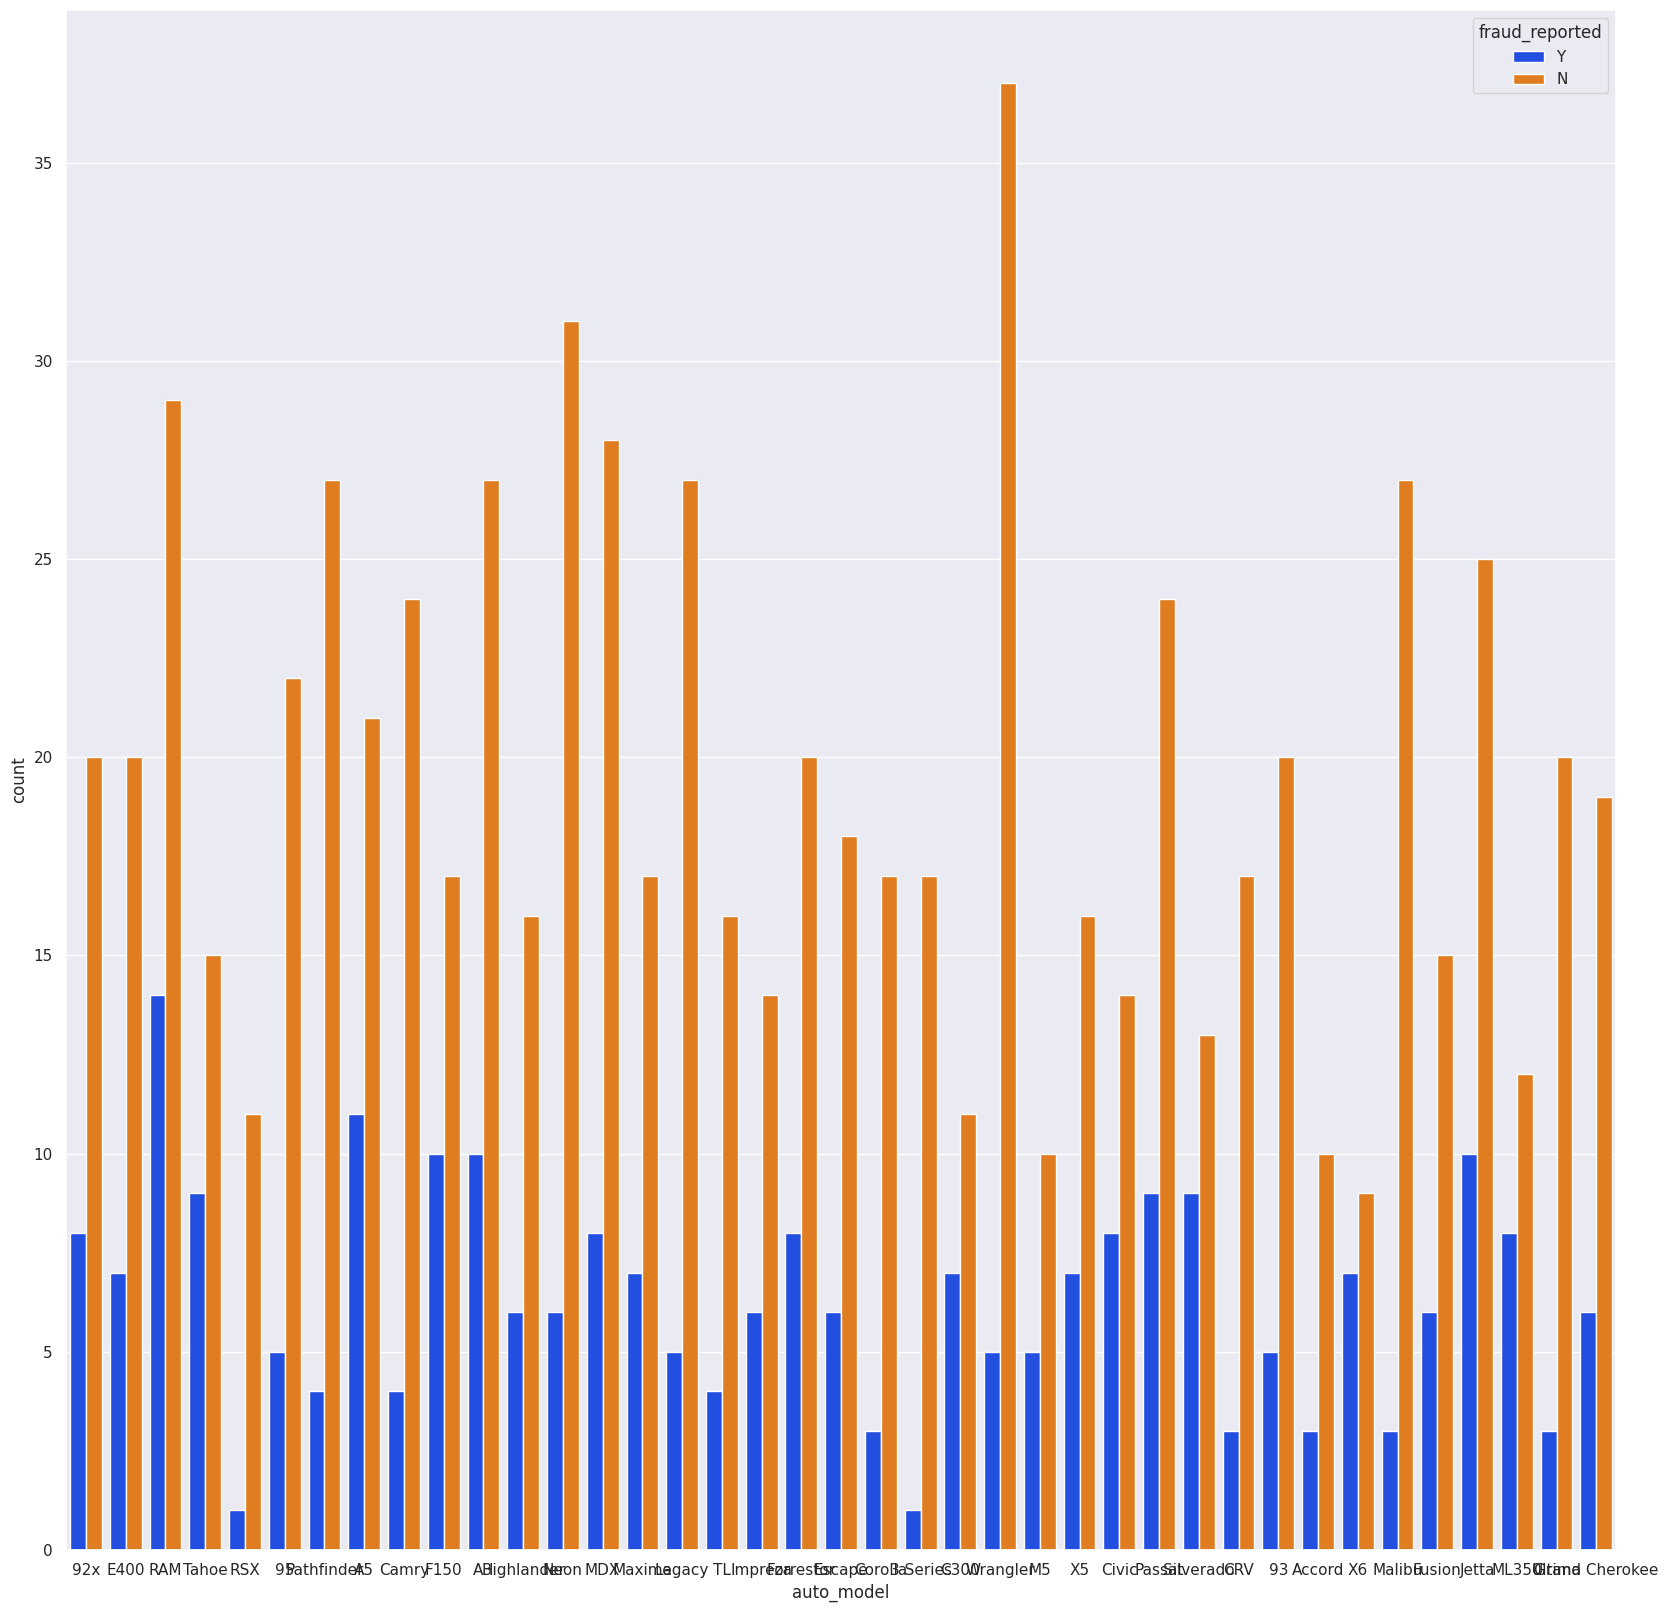

In [35]:
sns.countplot(data=df,x='auto_model',hue='fraud_reported',palette='bright')

In [36]:
df['fraud_reported'] = pd.get_dummies(df['fraud_reported'],drop_first=True,dtype=np.int64)

In [37]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

/tmp/ipykernel_46236/547959422.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cbar=True,square=True,cmap='tab20c',annot_kws={'size': 10},fmt='.2f')


<Axes: >

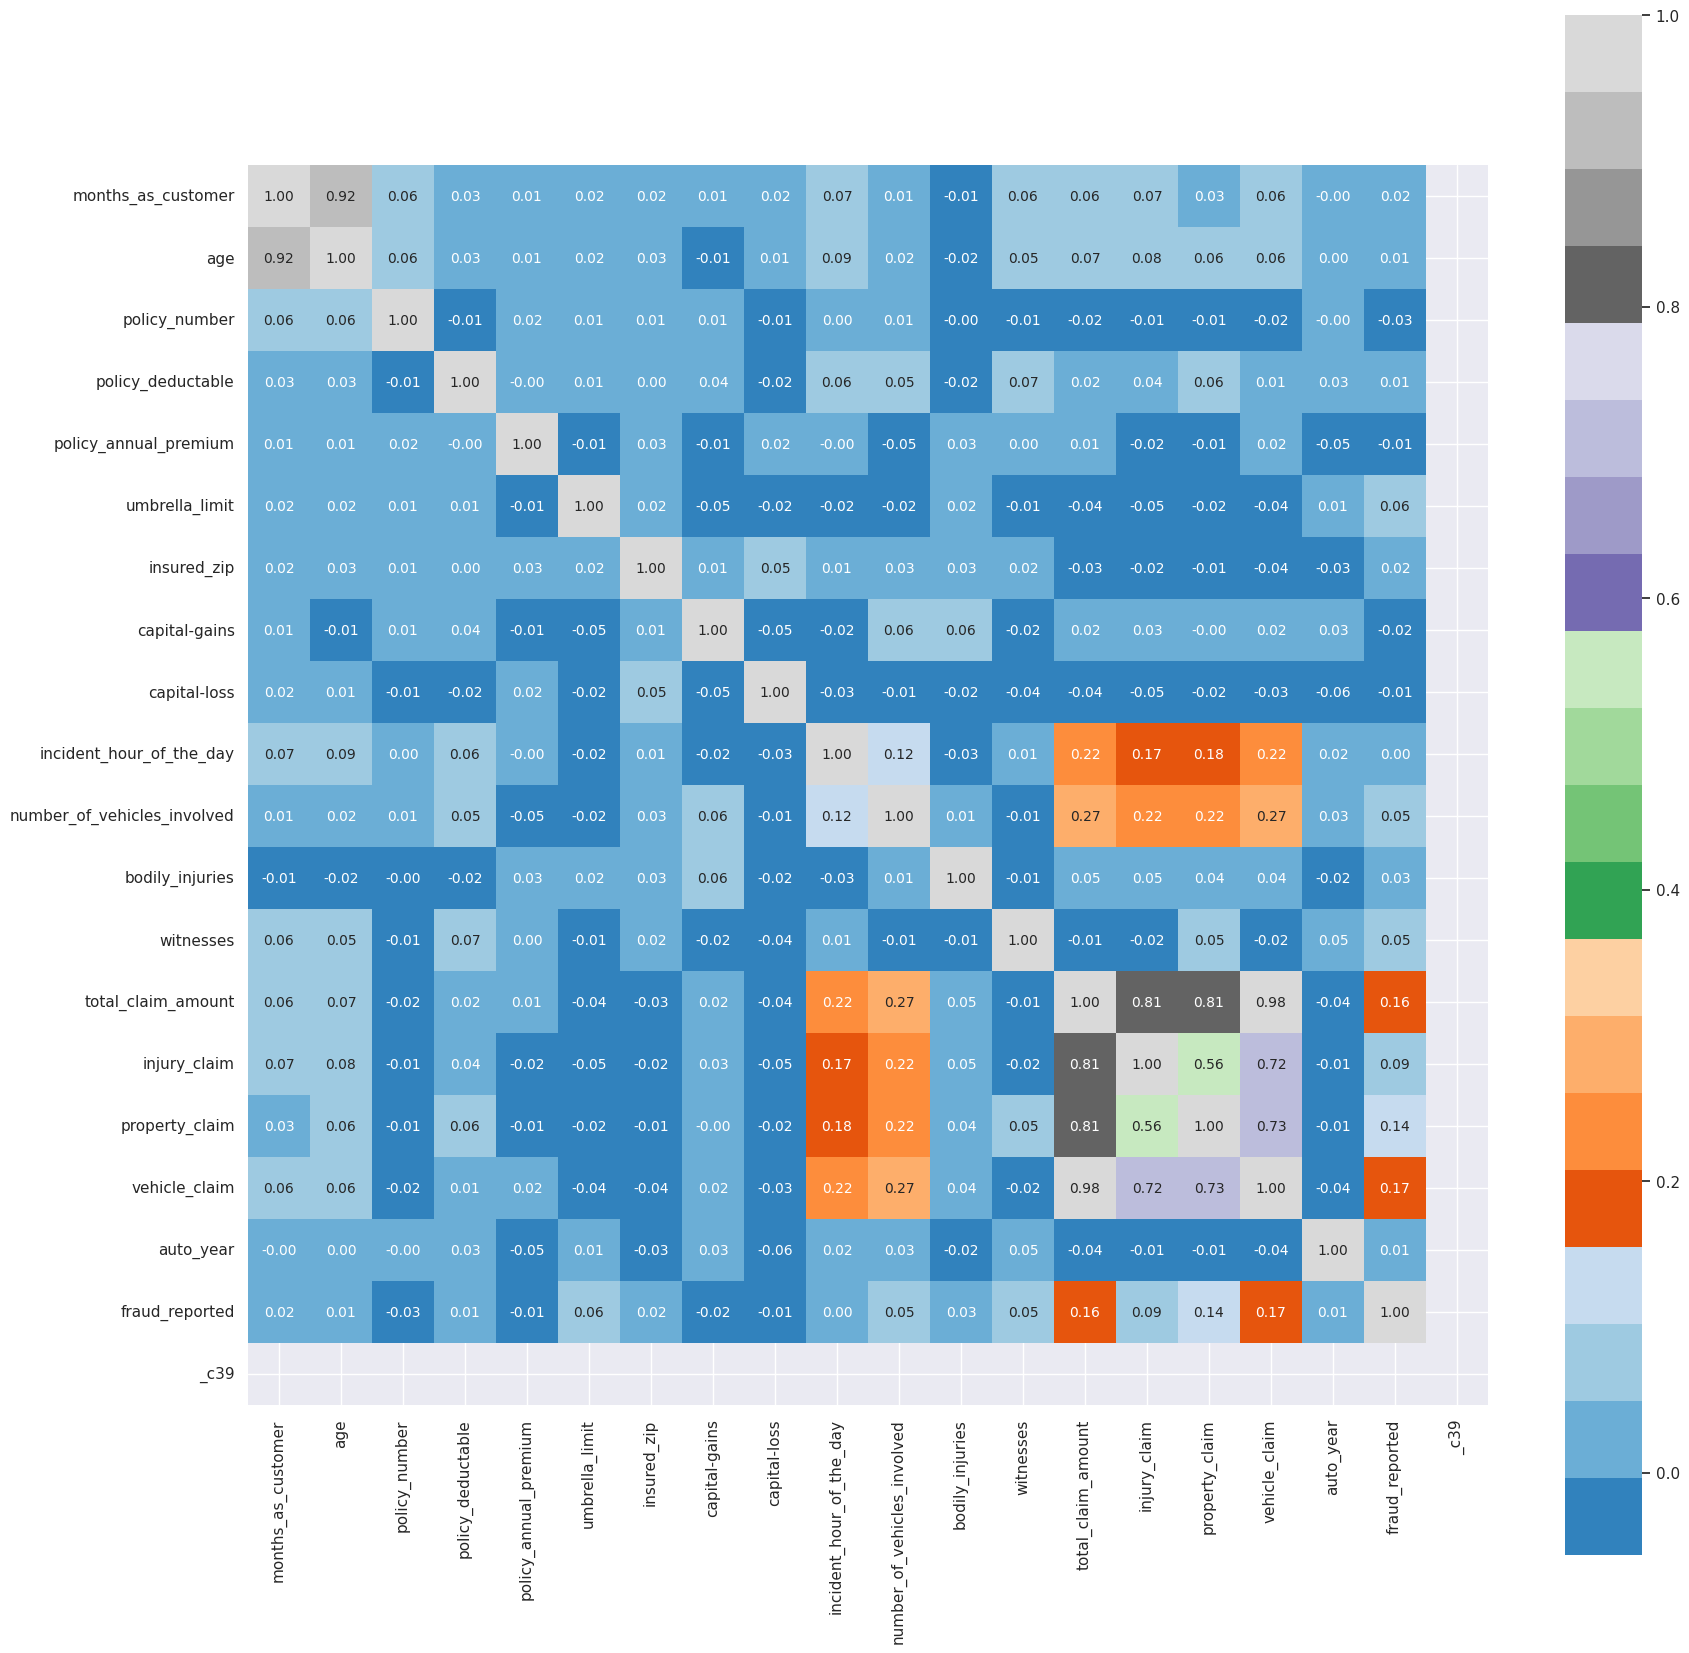

In [39]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr(),annot=True,cbar=True,square=True,cmap='tab20c',annot_kws={'size': 10},fmt='.2f')

/tmp/ipykernel_46236/2100583736.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['fraud_reported']].nlargest(40,'fraud_reported'),annot=True,cmap='tab20c')


<Axes: >

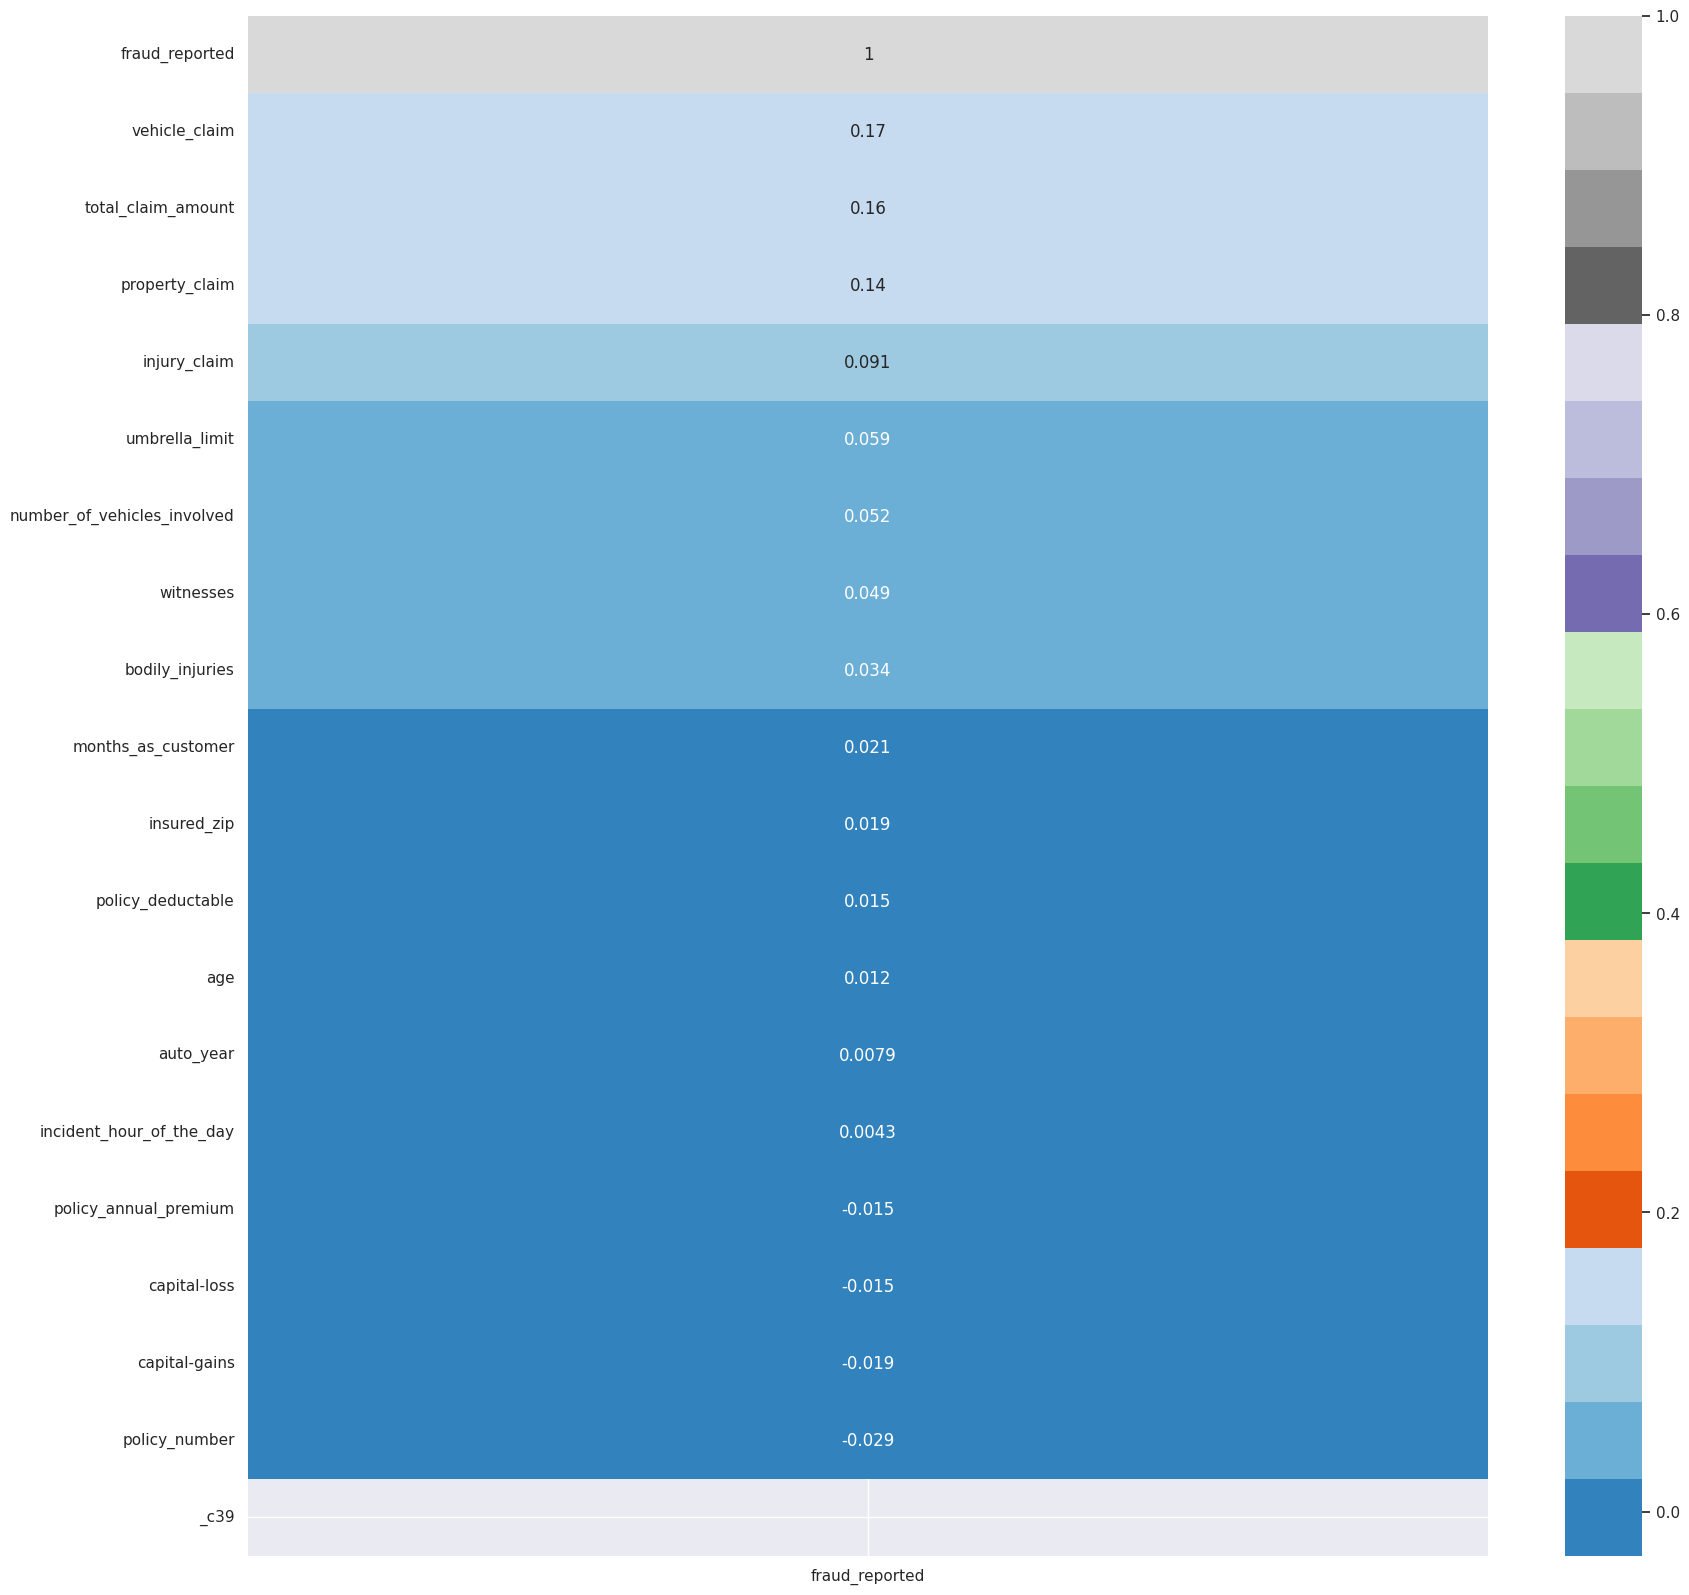

In [40]:
sns.heatmap(df.corr()[['fraud_reported']].nlargest(40,'fraud_reported'),annot=True,cmap='tab20c')

In [42]:
col_drop = ['policy_number','policy_bind_date','policy_state','policy_csl','policy_annual_premium','insured_zip','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_state','incident_city','incident_location','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','_c39']

In [43]:
df.drop(col_drop,axis=1,inplace=True)

In [44]:
num_df = df.select_dtypes(include = ['int64']).drop('fraud_reported', axis=1)

In [45]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount'],
      dtype='object')

In [47]:
num_df_col_names = num_df.columns
cat_df = df.select_dtypes(include = ['object'])

In [48]:
cat_df.columns

Index(['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available'],
      dtype='object')

In [50]:
enc = OneHotEncoder(handle_unknown='ignore',drop='first')
cat_enc_data=pd.DataFrame(enc.fit_transform(df[['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available']]).toarray())
enc.get_feature_names_out()

array(['insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'in

In [51]:
cat_enc_data.columns = enc.get_feature_names_out()
cat_enc_data

,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [54]:
X = pd.concat([num_df, cat_enc_data], axis = 1)
y = df['fraud_reported']

Split into Train and Test

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

In [59]:
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_df_col_names]),
columns=num_df_col_names, index= X_train.index)
for col in num_df:
        X_train[col] = X_train_num_scaled[col]

In [62]:
X_test_num_scaled = pd.DataFrame(scaler.fit_transform(X_test[num_df_col_names]),
columns=num_df_col_names, index= X_test.index)
for col in num_df:
        X_test[col] = X_test_num_scaled[col]
list(range(len(num_df_col_names),43))

[9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42]

In [63]:
cat_col_index = list(range(len(num_df_col_names),43))

### Apply SMOTENC to the imbalanced dataset

In [64]:
sm = SMOTENC(categorical_features=cat_col_index, random_state=123, sampling_strategy=.6)

In [65]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [66]:
X_train.value_counts()

months_as_customer  age        policy_deductable  umbrella_limit  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  insured_occupation_tech-support  insured_occupation_transport-moving  incident_type_Parked Car  incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  collision_type_Rear Collision  collision_type_Side Collision  incident_severity

In [67]:
y_train.value_counts()

0    527
1    316
Name: fraud_reported, dtype: int64

## Logistic Regression

In [69]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [70]:


#Training dataset
log_reg_pred_train = log_reg.predict(X_train)
log_reg_acc_train = accuracy_score(y_train,log_reg_pred_train)
print("Accuracy of Logistic regression for training data is :","{:.2f}%".format(100*log_reg_acc_train))

#Testing dataset
log_reg_pred_test = log_reg.predict(X_test)
log_reg_acc_test = accuracy_score(y_test,log_reg_pred_test)
print("Accuracy of Logistic regression for testing data is :","{:.2f}%".format(100*log_reg_acc_test ))



Accuracy of Logistic regression for training data is : 86.36%
Accuracy of Logistic regression for testing data is : 77.67%


### SVC

In [71]:


svc = SVC()
svc.fit(X_train,y_train)



SVC()

In [72]:


##Training dataset
svc_pred_train = svc.predict(X_train)
svc_acc_train = accuracy_score(y_train,svc_pred_train)
print("Accuracy of SVC for training data is :","{:.2f}%".format(100*svc_acc_train))

##Testing dataset
svc_pred_test = svc.predict(X_test)
svc_acc_test = accuracy_score(y_test,svc_pred_test)
print("Accuracy of SVC for testing data is :","{:.2f}%".format(100*svc_acc_test))



Accuracy of SVC for training data is : 90.75%
Accuracy of SVC for testing data is : 78.00%


In [73]:
#Hyperparameter Tuning
params = {
    'C':[50,10,1.0, 0.1, 0.01],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': ['scale']
}

grid_search_svc = GridSearchCV(svc,params,cv=5,n_jobs=-1,verbose=1)
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=1)

In [74]:
print(grid_search_svc.best_params_)

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [77]:
svc = grid_search_svc.best_estimator_
y_pred = svc.predict(X_test)


#Training dataset

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
print("Training accuracy of SVM Tree is:","{:.2f}%".format (100 * svc_train_acc))

#Testing dataset
svc_test_acc = accuracy_score(y_test, y_pred)
print("Testing accuracy of SVM Tree is:","{:.2f}%".format (100 * svc_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Training accuracy of SVM Tree is: 90.75%
Testing accuracy of SVM Tree is: 78.00%
[[199  27]
 [ 39  35]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       226
           1       0.56      0.47      0.51        74

    accuracy                           0.78       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.77      0.78      0.77       300



KNN 


In [81]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


#Training dataset
knn_train_acc = accuracy_score(y_train,knn.predict(X_train))
print("Training score of KNN is :","{:.2f}%".format (100 *knn_train_acc))

#Testing dataset
knn_test_acc = accuracy_score(y_test,y_pred)
print("Testing score of KNN is : ","{:.2f}%".format (100 *knn_test_acc))
      
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Training score of KNN is : 71.17%
Testing score of KNN is :  60.67%
[[139  87]
 [ 31  43]]
              precision    recall  f1-score   support

           0       0.82      0.62      0.70       226
           1       0.33      0.58      0.42        74

    accuracy                           0.61       300
   macro avg       0.57      0.60      0.56       300
weighted avg       0.70      0.61      0.63       300



In [82]:


#Hyperparameter Tuning
params = {
    'n_neighbors':[5,7,9,11,13,15,17,19,21,23,25,27,29],
    'weights': ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan']
}

grid_search_knn = GridSearchCV(knn,params,cv=10,n_jobs=-1,verbose=1)
grid_search_knn.fit(X_train, y_train)



Fitting 10 folds for each of 78 candidates, totalling 780 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [83]:
print(grid_search_knn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [85]:
knn = grid_search_knn.best_estimator_
y_pred = knn.predict(X_test)

In [86]:


#Training dataset
knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
print("Training accuracy of SVM Tree is:","{:.2f}%".format (100 * knn_train_acc))

#Testing dataset
knn_test_acc = accuracy_score(y_test, y_pred)
print("Testing accuracy of SVM Tree is:","{:.2f}%".format (100 * knn_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Training accuracy of SVM Tree is: 100.00%
Testing accuracy of SVM Tree is: 65.00%
[[145  81]
 [ 24  50]]
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       226
           1       0.38      0.68      0.49        74

    accuracy                           0.65       300
   macro avg       0.62      0.66      0.61       300
weighted avg       0.74      0.65      0.67       300

